# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Aryo Daffa Khairuddin]
- **Email:** [aryodaffakha48@gmail.com]
- **ID Dicoding:** []

## Menentukan Pertanyaan Bisnis

1.   Bagaimana tren peminjaman sepeda berdasarkan musim dan kondisi cuaca?
2.   Pada jam berapa peminjaman sepeda mencapai puncaknya dalam sehari?



## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

### Memuat data day.csv

In [2]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Memuat data hour.csv

In [3]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Dataset yang digunakan ada dua, yaitu:
- `day.csv` untuk data harian
- `hour.csv` untuk data per jam

dan akan menampilkan 5 data dari dataset tersebut.

### Assessing Data

### Menilai data `day_df`

In [4]:
#Mengecek tipe data dari tiap kolom yang terdapat dalam data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
#Mengecek apakah ada missing value atau tidak.
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
#Mengecek apakah ada duplikasi data atau tidak pada day_df dan mengecek parameter statistik
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai data `hour_df`

In [7]:
#Mengecek tipe data dari tiap kolom yang terdapat dalam data day_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
#Mengecek apakah ada missing value atau tidak.
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [9]:
#Mengecek apakah ada duplikasi data atau tidak pada day_df dan mengecek parameter statistik
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- day_df dan hour_df tidak terdapat missing value dan duplikasi data.
- Ada ketidaksesuaian tipe data pada day_df dan hour_df yaitu pada kolom dteday yang seharusnya tipe datanya adalah datetime.

### Cleaning Data

Mengkonversi tipe data kolom dteday pada **`day_df`**




In [10]:
# Konversi kolom dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Mengecek apakah tipe data sudah berubah
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Mengkonversi tipe data kolom dteday pada **`hour_df`**

In [11]:
# Konversi kolom dteday menjadi datetime
hour_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Mengecek apakah tipe data sudah berubah
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data pada **day_df** dan **hour_df** untuk kolom **dteday** sudah berubah menjadi **datetime**

## Exploratory Data Analysis (EDA)





### Explore day_df

In [12]:
# Mengonversi nilai numerik pada kolom 'season' dan 'weathersit' menjadi label yang lebih mudah dipahami
peta_musim = {1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'}
peta_cuaca = {1: 'Cerah', 2: 'Berawan', 3: 'Hujan Ringan', 4: 'Hujan Lebat'}

day_df['season'] = day_df['season'].map(peta_musim)
day_df['weathersit'] = day_df['weathersit'].map(peta_cuaca)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,0,1,0,6,0,Berawan,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,0,1,0,0,0,Berawan,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,0,1,0,1,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,0,1,0,2,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,0,1,0,3,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
# Analisis tren peminjaman berdasarkan musim
day_df.groupby("season").agg({
    "cnt": ["mean", "median", "min", "max", "std", "sum"]
})

cnt                                          
                     mean  median   min   max          std      sum
season                                                             
Musim Dingin  4728.162921  4634.5    22  8555  1699.615261   841613
Musim Gugur   5644.303191  5353.5  1115  8714  1459.800381  1061129
Musim Panas   4992.331522  4941.5   795  8362  1695.977235   918589
Musim Semi    2604.132597  2209.0   431  7836  1399.942119   471348

In [14]:
# Analisis tren peminjaman berdasarkan kondisi cuaca
day_df.groupby("weathersit").agg({
    "cnt": ["mean", "median", "min", "max", "std", "sum"]
})

cnt                                         
                     mean  median  min   max          std      sum
weathersit                                                        
Berawan       4035.862348  4040.0  605  8362  1809.109918   996858
Cerah         4876.786177  4844.0  431  8714  1879.483989  2257952
Hujan Ringan  1803.285714  1817.0   22  4639  1240.284449    37869

In [15]:
# Analisis kombinasi musim dan kondisi cuaca
day_df.groupby(["season", "weathersit"]).agg({
    "cnt": ["mean", "median", "min", "max", "std", "sum"]
})

cnt                                   \
                                  mean  median   min   max          std   
season       weathersit                                                   
Musim Dingin Berawan       4654.000000  4563.0  1096  7852  1523.445365   
             Cerah         5043.563107  5041.0  1495  8555  1595.693909   
             Hujan Ringan  1961.600000  2116.5    22  4639  1329.287378   
Musim Gugur  Berawan       5222.479167  4792.5  1115  7582  1431.160502   
             Cerah         5878.257353  5534.5  3285  8714  1356.647125   
             Hujan Ringan  2751.750000  2353.0  1842  4459  1199.339923   
Musim Panas  Berawan       4236.705882  4205.5  1471  8362  1579.038070   
             Cerah         5548.548673  5585.0  2028  8294  1467.655078   
             Hujan Ringan  1169.000000  1027.0   795  1685   461.679543   
Musim Semi   Berawan       2357.166667  2020.5   605  7836  1313.332082   
             Cerah         2811.135135  2417.0   431  6312  1409.960622   
             Hujan Ringan   934.750000   564.5   441  2169   826.272100   

                                   
                              sum  
season       weathersit            
Musim Dingin Berawan       302510  
             Cerah         519487  
             Hujan Ringan   19616  
Musim Gugur  Berawan       250679  
             Cerah         799443  
             Hujan Ringan   11007  
Musim Panas  Berawan       288096  
             Cerah         626986  
             Hujan Ringan    3507  
Musim Semi   Berawan       155573  
             Cerah         312036  
             Hujan Ringan    3739

**Insight day_df:**

- Pada musim gugur paling banyak peminjaman sepeda.
- pada pada kondisi cuaca cerah paling banyak peminjaman sepeda.

Jadi peminjaman sepeda tertinggi terjadi pada musim gugur dengan kondisi cuaca cerah, sedangkan peminjaman terendah terjadi pada musim semi dengan kondisi hujan ringan atau lebat.

### Explore hour_df

In [16]:
# Menampilkan statistik peminjaman sepeda berdasarkan jam (hr)
hour_df.groupby("hr").agg({
    "cnt": ["mean", "median", "min", "max", "std", "sum"]
})

cnt                                    
          mean median min  max         std     sum
hr                                                
0    53.898072   40.0   2  283   42.307910   39130
1    33.375691   20.0   1  168   33.538727   24164
2    22.869930   11.0   1  132   26.578642   16352
3    11.727403    6.0   1   79   13.239190    8174
4     6.352941    6.0   1   28    4.143818    4428
5    19.889819   19.0   1   66   13.200765   14261
6    76.044138   76.0   1  213   55.084348   55132
7   212.064649  208.0   1  596  161.441936  154171
8   359.011004  385.0   5  839  235.189285  261001
9   219.309491  216.0  14  426   93.703458  159438
10  173.668501  147.0   8  539  102.205413  126257
11  208.143054  180.0  10  663  127.495536  151320
12  253.315934  229.0   3  776  145.081134  184414
13  253.661180  224.0  11  760  148.107657  184919
14  240.949246  212.0  12  750  147.271574  175652
15  251.233196  227.0   7  750  144.632541  183149
16  311.983562  304.5  11  783  148.682618  227748
17  461.452055  475.0  15  976  232.656611  336860
18  425.510989  418.5  23  977  224.639304  309772
19  311.523352  309.5  11  743  161.050359  226789
20  226.030220  223.5  11  567  119.670164  164550
21  172.314560  173.5   6  584   89.788893  125445
22  131.335165  129.0   9  502   69.937782   95612
23   87.831044   80.0   2  256   50.846889   63941

In [17]:
# jam puncak peminjaman sepeda berdasarkan kategori pengguna (casual vs registered)
hour_df.groupby("hr").agg({
    "casual": "sum",
    "registered": "sum"
}).sort_values("registered", ascending=False)

,casual,registered
hr,,
17,54220,282640
18,44496,265276
8,15761,245240
19,35505,191284
16,53834,173914
7,8037,146134
20,26378,138172
9,22458,136980
12,49718,134696


In [18]:
# Menghitung total peminjaman sepeda untuk setiap jam dalam sehari
total_per_jam = hour_df.groupby("hr")["cnt"].sum()

# Menampilkan jam dengan total peminjaman tertinggi
total_per_jam[total_per_jam == total_per_jam.max()]

,cnt
hr,
17,336860


**Insight hour_df:**
- Peminjaman sepeda mencapai puncaknya pada jam 07:00 - 08:00 dan 17:00 - 18:00, menunjukkan bahwa sepeda banyak dipinjamkan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda berdasarkan musim dan kondisi cuaca?

<ipython-input-19-94cbc094d6d3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=day_df, x="season", y="cnt", hue="weathersit", ci=None)


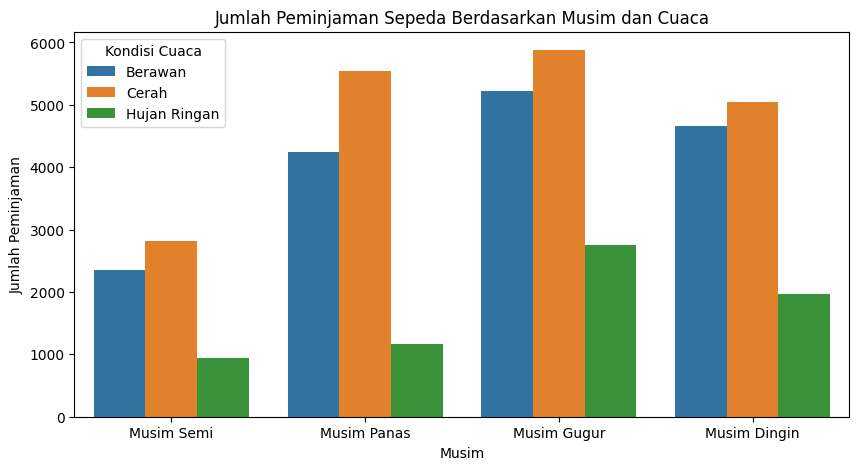

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(data=day_df, x="season", y="cnt", hue="weathersit", ci=None)
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Musim dan Cuaca")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.legend(title="Kondisi Cuaca")
plt.show()

**Insight:**
- Dari visualisasi, terlihat bahwa jumlah peminjaman tertinggi terjadi pada musim gugur  dan saat cuaca cerah . Sementara itu, pada musim semi dan saat hujan ringan, peminjaman cenderung menurun.

### Pertanyaan 2: Pada jam berapa peminjaman sepeda mencapai puncaknya dalam sehari?

<ipython-input-20-10347031f3d5>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hr", y="cnt", data=hour_df, estimator="sum", ci=None,


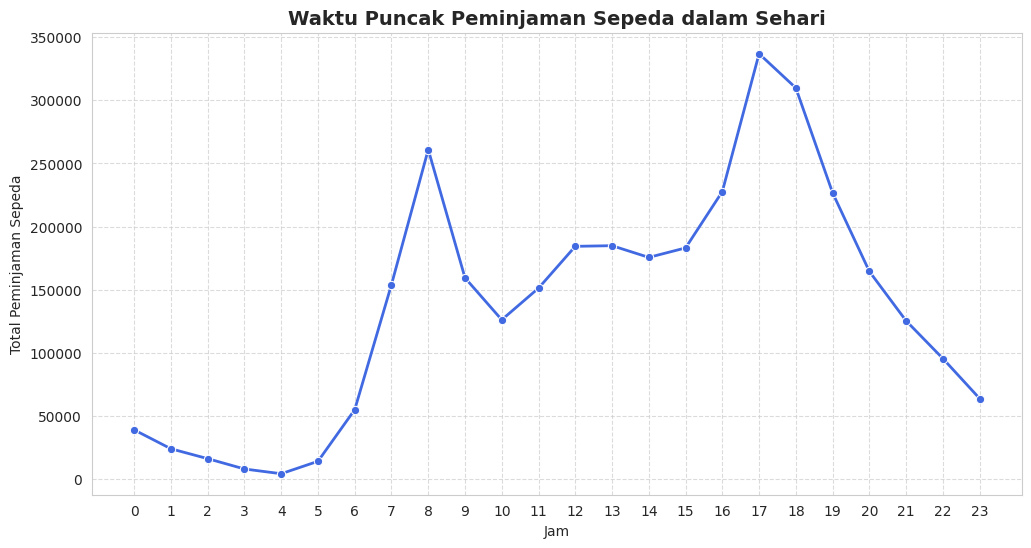

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="hr", y="cnt", data=hour_df, estimator="sum", ci=None,
             color="royalblue", marker="o", linewidth=2)
plt.title("Waktu Puncak Peminjaman Sepeda dalam Sehari", fontsize=14, fontweight="bold")
plt.xlabel("Jam"); plt.ylabel("Total Peminjaman Sepeda")
plt.xticks(range(0, 24)); plt.grid(ls="--", alpha=0.7)
plt.show()

**Insight:**
- Grafik menunjukkan bahwa jam 07:00 - 08:00 dan 17:00 - 18:00 adalah waktu dengan jumlah peminjaman tertinggi.

## Conclusion

### Conclution pertanyaan 1 : Bagaimana tren peminjaman sepeda berdasarkan musim dan kondisi cuaca?


*   Musim gugur memiliki jumlah peminjaman tertinggi, sedangkan musim semi  memiliki jumlah peminjaman terendah.

*   Cuaca cerah  menjadi kondisi paling ideal untuk peminjaman sepeda, sementara saat hujan ringan atau berawan, jumlah peminjaman cenderung lebih rendah. Hal ini menunjukkan bahwa musim dan cuaca sangat berpengaruh terhadap jumlah peminjaman sepeda.


### Conclution pertanyaan 2 : Pada jam berapa peminjaman sepeda mencapai puncaknya dalam sehari?



*   Jam sibuk peminjaman sepeda terjadi pada pukul 07:00 - 08:00 dan 17:00 - 18:00, yang bertepatan dengan waktu berangkat dan pulang.
*   Setelah pukul 20:00, jumlah peminjaman sepeda menurun drastis, menunjukkan bahwa sepeda lebih sering digunakan di pagi dan sore hari.



### Menggabungkan day_df dan hour_df menjadi main_data.csv

In [ ]:
all_df = pd.concat([day_df, hour_df], ignore_index=True)

  # Simpan ke file CSV
all_df.to_csv("main_data.csv", index=False)